## Perform Chi-Square test for Bank Churn prediction (find out different patterns on customer leaves the bank)  . Here I am considering only few columns to make things clear

### Import libraries

In [3]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Get the data

In [4]:
churn_df = pd.read_csv('combined_joro_v2.csv')

# Last column (classes)
y = churn_df.iloc[: , -1]

# Droping lon/lat columns
churn_df = churn_df.iloc[:, 0:19]



In [8]:
churn_df.head()

,Annual_mean_temp,MeanDiurnalRange,Isothermality,TempSeasonality,MaxTempWarmMo,MinTempColdMo,TempAnnRange,MeanTempWetQtr,MeanTempDryQtr,MeanTempWarmQtr,MeanTempColdQtr,AnnPercip,PercipWetMo,PercipDryMo,PercipSeasonality,PrecipWetQtr,PrecipDryQtr,PrecipWrmQtr,PrecipColdQtr
0,10.48600,9.234667,26.11909,977.9761,27.53200,-7.824000,35.35600,21.88133,-1.892000,22.15267,-1.892000,1281,298,28,83.33064,703,93,696,93
1,11.59383,10.061000,28.02195,973.2212,28.90000,-7.004000,35.90400,23.23733,-0.714000,23.23733,-0.714000,1277,296,27,82.58533,697,94,697,94
2,15.76607,7.979762,26.54023,814.3849,31.47619,1.409524,30.06667,22.35794,6.014286,25.88492,6.014286,1328,214,37,49.53687,511,139,429,139
3,15.14600,8.420667,27.26194,832.6071,31.27200,0.384000,30.88800,21.99533,5.146000,25.47533,5.146000,1348,216,35,50.62211,519,134,447,134
4,15.31150,8.241000,27.01967,823.9673,31.24800,0.748000,30.50000,22.04267,5.428000,25.54000,5.428000,1345,216,36,50.29088,518,136,442,136


### Here we have 4 category predictors and one category response. Exited, the response column represnts customer left the bank or not.

## Before performig Ch-Square test we have to make sure data is label encoded.

In [6]:
label_encoder = LabelEncoder()
#churn_df['Geography'] = label_encoder.fit_transform(churn_df['Geography'])
#churn_df['Gender'] = label_encoder.fit_transform(churn_df['Gender'])

columns = churn_df.columns

for col in columns:
    #print(col)
    churn_df[col] = label_encoder.fit_transform(churn_df[col])

In [18]:
churn_df.head()

,Annual_mean_temp,MeanDiurnalRange,Isothermality,TempSeasonality,MaxTempWarmMo,MinTempColdMo,TempAnnRange,MeanTempWetQtr,MeanTempDryQtr,MeanTempWarmQtr,MeanTempColdQtr,AnnPercip,PercipWetMo,PercipDryMo,PercipSeasonality,PrecipWetQtr,PrecipDryQtr,PrecipWrmQtr,PrecipColdQtr
0,1137,1042,731,1985,877,1172,1456,1571,1034,1118,1245,899,291,28,1659,646,93,664,93
1,1307,1251,1249,1968,1095,1231,1505,1942,1158,1341,1374,895,289,27,1617,640,94,665,94
2,2013,544,842,1353,1622,1861,955,1702,1627,2077,1983,945,208,37,741,474,139,414,139
3,1851,722,1054,1423,1585,1741,1057,1601,1538,1969,1861,963,210,35,792,481,134,430,134
4,1891,644,982,1383,1580,1786,1012,1615,1572,1991,1903,960,210,36,779,480,136,425,136


## Chi-Square test 

In [19]:
from sklearn.feature_selection import chi2

In [14]:
#X = churn_df.drop('Exited',axis=1)
#y = churn_df['Exited']

In [20]:
chi_scores = chi2(churn_df,y)

In [21]:
chi_scores

(array([ 40498.74571575, 930930.68190907, 146816.92679353,  53735.08053549,
         13791.22435391,  83486.30791691, 188353.09911399, 147520.58298131,
          1339.4005997 ,   1193.18446211,  68575.80881717, 421066.7499105 ,
        116197.72959635,  20957.52138325, 103089.47041432, 259058.24748614,
         73384.34843143, 396698.9385238 ,  45337.61107805]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.09753642e-293, 1.84717973e-261, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))

### here first array represents chi square values and second array represnts p-values

In [26]:
p_values = pd.Series(chi_scores[1],index = churn_df.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

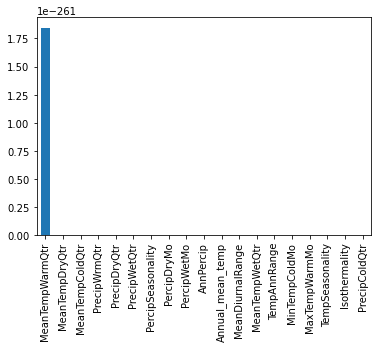

In [24]:
p_values.plot.bar()

# A different take
Taken from: https://www.youtube.com/watch?v=LTE7YbRexl8

In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
import numpy as np

In [21]:
chi2_selector = SelectKBest(chi2, k=7)
kbest = chi2_selector.fit_transform(churn_df, y)

In [22]:
scores = pd.DataFrame(list(zip(churn_df.columns, chi2_selector.scores_)), columns=['feature', 'score'])
scores.sort_values(by='score',ascending=False)

,feature,score
1,MeanDiurnalRange,930930.681909
11,AnnPercip,421066.749910
17,PrecipWrmQtr,396698.938524
15,PrecipWetQtr,259058.247486
6,TempAnnRange,188353.099114
7,MeanTempWetQtr,147520.582981
2,Isothermality,146816.926794
12,PercipWetMo,116197.729596
14,PercipSeasonality,103089.470414
5,MinTempColdMo,83486.307917


In [23]:
print('Original features:', churn_df.shape[1])
print("Selected features:", kbest.shape[1])

Original features: 19
Selected features: 7


In [24]:
np.asarray(churn_df.columns)[chi2_selector.get_support()]

array(['MeanDiurnalRange', 'Isothermality', 'TempAnnRange',
       'MeanTempWetQtr', 'AnnPercip', 'PrecipWetQtr', 'PrecipWrmQtr'],
      dtype=object)